In [1]:
import numpy as np

In [2]:
import os
datapath = "../../../deeplearning/TensorFlow2.0_ResNet/dataset/"
print(os.path.exists(datapath))

True


In [33]:
import pathlib

x_train_paths = list(pathlib.Path(os.path.join(datapath, "train")).glob("*/*"))
print(len(x_train_paths))
y_train = [pathlib.Path(path).parent.name for path in x_train_paths]
print(len(y_train))

1488
1488


In [ ]:
x_valid_paths = list(pathlib.Path(os.path.join(datapath, "valid")).glob("*/*"))
print(len(x_valid_paths))
y_valid = [pathlib.Path(path).parent.name for path in x_valid_paths]
print(len(y_valid))

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
Y_t= le.transform(y_train)
Y_v = le.transform(y_valid)
print(y_train[1], " ", Y_t[1])
print(y_train[1000], " ", Y_t[1000])
print(len(Y_v))

non-COVID   1
COVID   0
498


In [5]:
import tensorflow as tf
import keras

In [6]:
# class ensembleDataGen(tf.keras.utils.Sequence):
    
#     def __init__(self, paths, labels, batch_size=32, dim=(224, 224), n_channels=3, n_classes=2, shuffle=True):
#         self.dim =dim
#         self.batch_size = batch_size
#         self.n_channels= n_channels
#         self.n_classes= n_classes
#         self.paths = paths
#         self.labels = labels
#         self.shuffle = shuffle
#         self.on_epoch_end()
    
#     def on_epoch_end(self):
#         self.indexes = np.arange(len(self.paths))
#         if self.shuffle==True:
#             np.random.shuffle(self.indexes)
    
# #     def __data_generation(self, list_of_paths, list_of_labels):
# #         'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
# #         # initialization
# #         x = np.empty((self.batch_size, *self.dim, self.n_channels))
# #         y = np.empty((self.batch_size), dtype=int)
        
# #         for i, path, label in enumerate(list_of_paths, list_of_labels):
# #             image = tf.keras.preprocessing.image.load_img(path)
# #             image_arr = tf.keras.preprocessing.image.img_to_array(image)
# #             image_arr = tf.image.resize(image_arr,(self.dim[0], self.dim[1])).numpy()
# #             x[i, ] = image_arr
            
# #             y[i] = label
            
# #         return x, y
    
#     def __len__(self):
#         return (len(self.paths) // self.batch_size)
    
#     def __getitem__(self, index):
        
#         indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
#         X, y = self.__get_data(batches)
# #         list_of_paths = [self.paths[k] for k in indexes]
# #         list_of_labels = [self.labels[p] for p in indexes]
        
# #         X, y = self.__data_generation(list_of_paths, list_of_labels)
# #         return X, y
# #         pass
    
#     def __get_input(self, path):
# #         image = tf.keras.preprocessing.image.load_img(path)
# #         image_arr = tf.keras.preprocessing.image.img_to_array(image)
# #         image_arr = tf.image.resize(image_arr,(dim[0], dim[1])).numpy()
        
# #         return image_arr / 255
#         pass
    
#     def __get_output(self, label):
# #         return tf.keras.utils.to_categorical(label, num_classes=self.n_classes)
#         pass
#     def __get_data(self, indexes):
        
# #         X_batch = np.asarray([self.__get_input(x) for x in self.paths])
        
# #         y_batch = np.asarray([self.__get_output(y) for y in self.labels])
# #         return X_batch, y_batch

In [7]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, paths, labels, batch_size=16, dim=(224, 224), n_channels=3,
                 n_classes=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.paths = paths
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(len(self.paths) / self.batch_size)

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_paths = [self.paths[k] for k in indexes]
        y = [self.labels[k] for k in indexes]

        # Generate data
        X = self.__data_generation(list_paths)

        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.paths))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_paths):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
#         y = np.empty((self.batch_size), dtype=object)

        # Generate data
        for i, path in enumerate(list_paths):
            
            image = tf.keras.preprocessing.image.load_img(path)
            image_arr = tf.keras.preprocessing.image.img_to_array(image)
            image_arr = tf.image.resize(image_arr,(self.dim[0], self.dim[1])).numpy()
            X[i,] = image_arr/255

            # Store class

        return X

In [8]:
generator = DataGenerator(x_train_paths, Y)

In [9]:
x, y = generator[0]

In [10]:
print(x.shape)
print(y.shape)

(16, 224, 224, 3)
(16, 2)


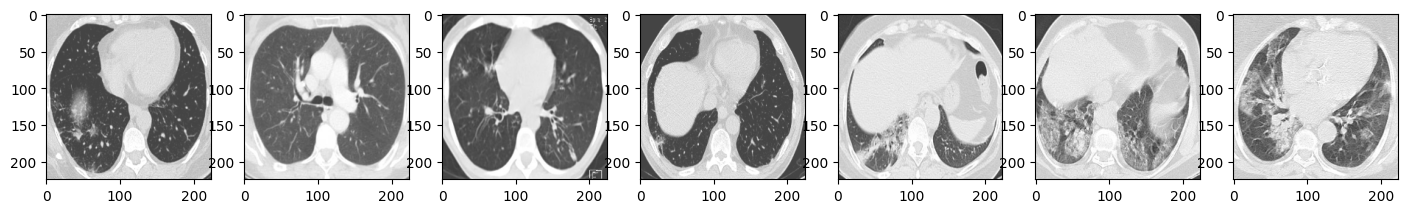

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for i in range(1, 8):
    ax = plt.subplot(1, 8, i)
    plt.imshow(x[i])
plt.show()

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 2)                 3

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [14]:
history = model.fit(generator, 
                   batch_size=16,
                   epochs=2)

Epoch 1/2
93/93 [==============================] - 78s 589ms/step - loss: 0.7484 - binary_accuracy: 0.5974
Epoch 2/2
93/93 [==============================] - 39s 423ms/step - loss: 0.4980 - binary_accuracy: 0.7782


In [16]:
model.trainable = False
# densenet_1.trainable = False
# densenet_2.trainable = False
models = [model, model, model]
# to avoid conflicts with naming
for layer in models[0].layers:
    layer._name = layer.name + str('_0')
for layer in models[1].layers:
    layer._name = layer.name + str('_1')
for layer in models[2].layers:
    layer._name = layer.name + str('_2')

In [28]:
class ensemDataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, paths, labels, batch_size=16, dim=(224, 224), n_channels=3,
                 n_classes=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.paths = paths
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(len(self.paths) / self.batch_size)

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_paths = [self.paths[k] for k in indexes]
        y = [self.labels[k] for k in indexes]

        # Generate data
        X = self.__data_generation(list_paths)

        return [X, X, X], y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.paths))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_paths):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
#         y = np.empty((self.batch_size), dtype=object)

        # Generate data
        for i, path in enumerate(list_paths):
            
            image = tf.keras.preprocessing.image.load_img(path)
            image_arr = tf.keras.preprocessing.image.img_to_array(image)
            image_arr = tf.image.resize(image_arr,(self.dim[0], self.dim[1])).numpy()
            X[i,] = image_arr/255

            # Store class

        return X

In [23]:
# average = tf.keras.layers.Average()([models[0].output, models[1].output, models[2].output])
# dense = tf.keras.layers.Dense(2, activation='softmax')(average)

# ensemble = tf.keras.Model([model.input, model.input, model.input], dense)

In [22]:
ensemble = tf.keras.models.load_model("implementation1/models/test4/ensemble")

In [48]:
ensem_t_generator = ensemDataGenerator(x_train_paths, Y_t)

In [43]:
x_valid_paths = list(pathlib.Path(os.path.join(datapath, "valid")).glob("*/*"))
print(len(x_valid_paths))
y_valid = [pathlib.Path(path).parent.name for path in x_valid_paths]
print(len(y_valid))

498
498


In [49]:
ensem_v_generator = ensemDataGenerator(x_valid_paths, Y_v)

In [45]:
ensemble.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [50]:
ensemble_history = ensemble.fit(ensem_t_generator,
                                epochs=1,
                                steps_per_epoch=92,
                               validation_data = ensem_v_generator)

92/92 [==============================] - 388s 4s/step - loss: 0.8336 - binary_accuracy: 0.5000 - val_loss: 0.8972 - val_binary_accuracy: 0.5000


In [15]:
# for i, path, label in enumerate(x_train_paths, y_train):
#     print(i, " ", path, " ", label)
#     if (i==5):break

